<a href="https://colab.research.google.com/github/Sasuke417/Machine_Learning/blob/main/Copy_of_fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras

!pip install tensorflow-datasets

import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

!pip install -q tensorflow-hub

import tensorflow_hub as hub

In [8]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-07-25 20:17:29--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.1’

train-data.tsv.1    100%[===================>] 349.84K  --.-KB/s    in 0.03s   

2021-07-25 20:17:29 (11.7 MB/s) - ‘train-data.tsv.1’ saved [358233/358233]

--2021-07-25 20:17:29--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.1’

valid-data.tsv.1    100%[====

In [9]:
df_train = pd.read_csv(train_file_path, sep='\t',header=None)
df_test = pd.read_csv(test_file_path, sep='\t',header=None)

Convert labels ham and spam to 0 and 1

In [10]:
df_train["spam"] = pd.get_dummies(df_train[0], drop_first=True)
df_train = df_train.drop(0, axis=1)

df_test["spam"] = pd.get_dummies(df_test[0], drop_first=True)
df_test = df_test.drop(0, axis=1)

Plotting spam count

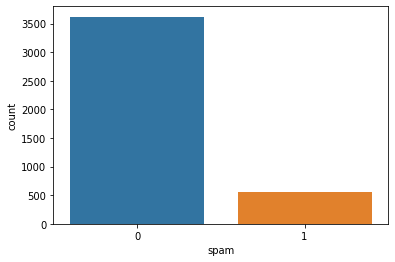

In [11]:
sns.countplot(x="spam",data=df_train)

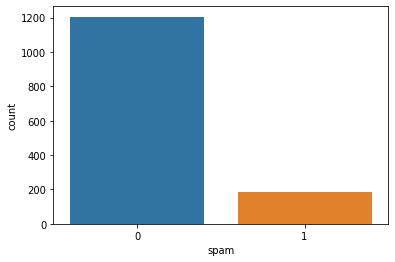

In [12]:
sns.countplot(x="spam",data=df_test)

In [14]:
train_data = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_train[1].values, tf.string),
            tf.cast(df_train['spam'].values, tf.int32)
        )
    )
)

test_data = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_test[1].values, tf.string),
            tf.cast(df_test['spam'].values, tf.int32)
        )
    )
)

In [15]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [16]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [19]:
model = Sequential([
    hub_layer,
    Dense(16,activation='relu'),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(
    train_data.shuffle(10000).batch(512),
    epochs=100,
    validation_data=test_data.batch(512),
    verbose=1
)

Epoch 1/100
9/9 [==============================] - 4s 24ms/step - loss: 0.5677 - accuracy: 0.8504 - val_loss: 0.5037 - val_accuracy: 0.8614
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4578 - accuracy: 0.8648 - val_loss: 0.4247 - val_accuracy: 0.8642
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3982 - accuracy: 0.8653 - val_loss: 0.3822 - val_accuracy: 0.8642
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3642 - accuracy: 0.8658 - val_loss: 0.3552 - val_accuracy: 0.8649
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3414 - accuracy: 0.8660 - val_loss: 0.3349 - val_accuracy: 0.8649
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3231 - accuracy: 0.8660 - val_loss: 0.3182 - val_accuracy: 0.8642
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3073 - accuracy: 0.8660 - val_loss: 0.3038 - val_accuracy: 0.8649
Epoch 8/100
9/9 [=====

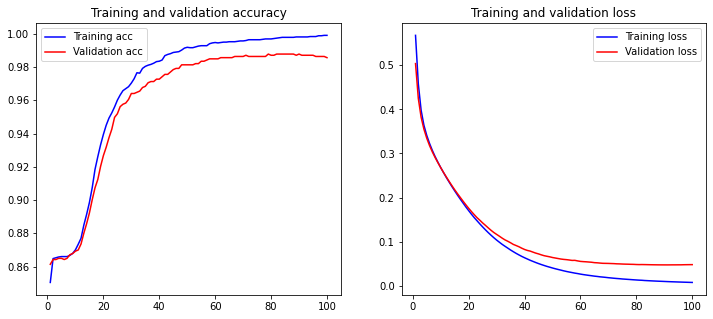

In [22]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [25]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name,value))

3/3 - 0s - loss: 0.0481 - accuracy: 0.9856
loss: 0.048
accuracy: 0.986


In [26]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  pred_text = [pred_text]
  prediction = tf.cast(pred_text, tf.string)
  prediction = model.predict(prediction)[0]
  if prediction[0] > 0:
    prediction = [prediction[0], 'spam']
  else:
    prediction = [prediction[0], 'ham']

  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[-9.485032, 'ham']


In [27]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
